Var Model
===
As [statsmodels](http://www.statsmodels.org/dev/vector_ar.html):

---
We are interested in modeling a $T \times K$ multivariate time series $Y$, where $T$ denotes the number of observations and $K$ the number of variables. One way of estimating relationships between the time series and their lagged values is the vector autoregression process:

\begin{eqnarray}
Z_t &=& A_1 Z_{t-1} + \ldots + A_p Z_{t-p} + u_t \\
u_t &\sim& {\sf Normal}(0, \Sigma_u)
\end{eqnarray}
where $A_i$ is a $K \times K$ coefficient matrix.

---

Suppose we wants to predict $Y_t$ from observation $X_t$ as follows:
$$ Y_t= c_{11} + \beta_{11} X_{t-1} + u_t$$
And sometimes, $X_t$ seems to has the following relation:

$$ X_t= c_{12} + \beta_{12} Y_{t-1} + u_t$$

Thus the vector autoregression with one lag, Var(1), is in the form as follows:
$$ Z_t=C +\beta Z_{t-1}+u_t$$
where $Z_t=(X_t,Y_t)^t$.



Note
---
1. After Updating the Anaconda, IR kernel can't work as usual. Set PATH to 
```shell
shell> export R_HOME=$anaconda/lib/R
```
- and install rpy2 by pip might solve the problem. Reason still unknown.
- In Linux, we updated R to the last release, 3.4.1 with the configuration
```shell
shell> ./configure --prefix=/usr --libdir=/usr/lib64 --enable-shlib --with-tcltk
```
to install R in the system-setting directory, compiled the shared library, and embeded tcltk module. Jupyter notebook R-kernel, ir, requires rpy2 module which could be compiled only with shared R libtary in my system. 
- if these could not solve the rpy2-installation problem, ckeck the system variables, ```PATH``` and ```R_HOME``` whether are set correct.



Comunication between Python and R
---
```
Why use R computation in Python, exactly on Jupyter notebook, environment?
```
As well known, statsmodels is one of the best python packages availabel professional and powerful tools on doing statistical computation. The ability of Python computation is based on individual developed modules and packages and they are slimless integrated together by the developers; statsmodels is too. However, plenty of conflicts among the deveopers exist, what kind of alogrithm is suitable and what kind of technique is more efficient, for instance. Ordinary Linera Simulation, (abbreviated by OLS), is one of scheme, on which statsmodels relys; it is also used to estimate the model in vector autoregression model, (Var). The OLS scheme, statsmodels used, is relid on the deprciated scheme in pandas, another Python statistics package and has no another replacement yet. In other words, the schemes involving Var model estimation can't work as usual. 

R owns tons of statistical packages but Python owns much functionalites in calculation,layout and others. Integrating both is double more flexible in statistical work.
R 擁有超多的統計程式庫, Python 具備計算, 輸出等等便利的功能, 整合兩者在統計工作則有加成作用. 

Neither on the shell environment nor graphical user interface of R and python, R and Python could not simultaneously run together, comunicate and exchage with each other. Juputer notebook supports both interfaces for Python, (called Python 2/3 kernel), and R (called ir kernel), on which the script language can run on its kernel and get the output if any; moreover, Jupyter also supports the intelligent feature: external plugin in python kernel, at which it can execute other language, R includes, and share computation result between them. 

Before building up the hybrid Python-R computation system for Var model, we had installed the necessary Python 3.6.x packages and modules and tested both on Mac OS and Poteus Linux (live Slackware-clone system) systems. These installed packages include:  

1. whole juputer environment,
   - on Mac system, based on anaconda x86 solution and annually installed others if necessary,
   - on Porteus, manually install Python3.6 with jupyter packages more than 150 third-party packages.
- Python packaages, on the priciple of leading the late release, we had installed them  from cofiguration, compilation and installation  almost by scratch.  include
  - statsmodels, rpy2, IRkernel
- R-3.4.1 with necessary packages for Var model estimation: AER, timeSeries, tseries, vrtest, quantmod, vars etc.
- development tools: efficient computation requires high optimized libraries, such as blas/lapack, and they require a fortran compiler to make binary; thus we had installed Xcodes and its essentials for Mac system, gcc/gfortran for porteus Linux. 


Process of comunication  with R and Python 
---
1. load the extension, 載入 Ｒ 模組
```
%load_ext rpy2.ipython
```
- Acclaim R-cell in Python kernel，指定使用 R 程式
```
%%R
...
R-codes
...
```
- one line R-mode, 使用一行 R 程式模式
```
%R R-code
```
- Retrieve R-data in Python env 轉換 R 物件為 Python 物件
```python
P = %R R-object
```
- Convert Python-object to R, **-i** could be omitted 轉換 Python 物件為 R 物件
```
%R -i P
```

In [1]:
%load_ext rpy2.ipython

1. load "quantmod" package, had to be update to the last release, **&ge;0.4 here**, since yahoo service policy changes (or ceased).
- ```na.omit()```, remove **NaN** data
- ```head(),tail()```, data obvervation

In [2]:
%%R

library(quantmod)
start <- "2017-01-01"
end <- "2017-08-3"

TW3008.dat = getSymbols("3008.TW", from=start,to=end, adjust = T, auto.assign = FALSE)
# na.approx(), na.fill()
na.omit(TW3008.dat)

write.csv(TW3008.dat,file="data/TW3008.csv",index.name="Date",sep=",")

/Users/cch/anaconda36/anaconda/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: xts

  warnings.warn(x, RRuntimeWarning)
/Users/cch/anaconda36/anaconda/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: zoo

  warnings.warn(x, RRuntimeWarning)
/Users/cch/anaconda36/anaconda/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: 
Attaching package: ‘zoo’


  warnings.warn(x, RRuntimeWarning)
/Users/cch/anaconda36/anaconda/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


  warnings.warn(x, RRuntimeWarning)
/Users/cch/anaconda36/anaconda/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: TTR

  warnings.warn(x, RRuntimeWarning)
/Users/cch/anaconda36/anaconda/lib/python3.6/site-packages/rpy2/rint

In [6]:
%%R

write.zoo(TW3008.dat,file="data/TW3008-1.csv",index.name="Date",sep=",")

In [ ]:
%R tail(TW3008.dat) 

In [77]:
%%R

data=TW3008.dat
index(data)
data$date<-index(data)
data[1]

           X3008.TW.Open X3008.TW.High X3008.TW.Low X3008.TW.Close
2017-01-03          3805          3810         3780           3795
           X3008.TW.Volume date
2017-01-03          214000 3795


In [39]:
%%R
TW3008.dat.b


Error in withVisible({ : object 'TW3008.dat.b' not found


/Users/cch/anaconda36/anaconda/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Error in withVisible({ : object 'TW3008.dat.b' not found

  warnings.warn(x, RRuntimeWarning)


In [2]:
%%R

library(quantmod)
start <- "2017-01-01"
end <- "2017-07-27"

#TW3008.dat = getSymbols("3008.TW", from=start,to=end, adjust = T, auto.assign = FALSE)
# na.approx(), na.fill()
#na.omit(TW3008.dat)
TW3008.dat=read.csv("data/TW3008.csv")

/Users/cch/anaconda36/anaconda/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: xts

  warnings.warn(x, RRuntimeWarning)
/Users/cch/anaconda36/anaconda/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: zoo

  warnings.warn(x, RRuntimeWarning)
/Users/cch/anaconda36/anaconda/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: 
Attaching package: ‘zoo’


  warnings.warn(x, RRuntimeWarning)
/Users/cch/anaconda36/anaconda/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


  warnings.warn(x, RRuntimeWarning)
/Users/cch/anaconda36/anaconda/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: TTR

  warnings.warn(x, RRuntimeWarning)
/Users/cch/anaconda36/anaconda/lib/python3.6/site-packages/rpy2/rint

In [3]:
%R tail(TW3008.dat) 

array([[   5525.,    5530.,    5425.,    5425.,  453000.,    5425.],
       [   5380.,    5495.,    5380.,    5485.,  316000.,    5485.],
       [   5535.,    5600.,    5520.,    5600.,  318000.,    5600.],
       [   5600.,    5610.,    5495.,    5495.,  378000.,    5495.],
       [   5515.,    5600.,    5515.,    5520.,  342000.,    5520.],
       [   5520.,    5530.,    5420.,    5445.,  393000.,    5445.]])

In [7]:
%R TW3008.dat["2017-07-20::2017-07-27",1:3]

array([[ 5595.,  5635.,  5510.],
       [ 5525.,  5530.,  5425.],
       [ 5380.,  5495.,  5380.],
       [ 5535.,  5600.,  5520.],
       [ 5600.,  5610.,  5495.],
       [ 5515.,  5600.,  5515.]])

1. Return, volume: rescale the data on column 4 and 5 by log
- plot
- cbind(Return,volumn), create the data required


In [4]:
%%R

Return = diff(log(TW3008.dat[, 4]))*100
volume = log(TW3008.dat[, 5])

plot(Return, xlab = "dates", main = "Time series of TW 3008 returns")
plot(volume, xlab = "dates", main = "Time series of TW 3008 volume")
dat0=cbind(Return, volume)
head(dat0)
dat=na.omit(dat0)
head(dat)

           X3008.TW.Close X3008.TW.Volume
2017-01-04     -0.3960401        12.73376
2017-01-05      6.8992871        14.28676
2017-01-06      2.3185907        13.86525
2017-01-09     -3.3111547        13.57216
2017-01-10      3.0696087        13.14803
2017-01-11      0.8428707        13.34870


No picture output, try to make it in **Python**,

In [5]:
ret= %R Return
vol= %R volume

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

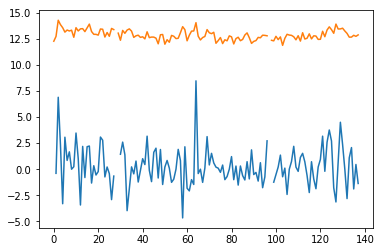

In [7]:
plt.plot(ret)
plt.plot(vol)

Picture Refined
---

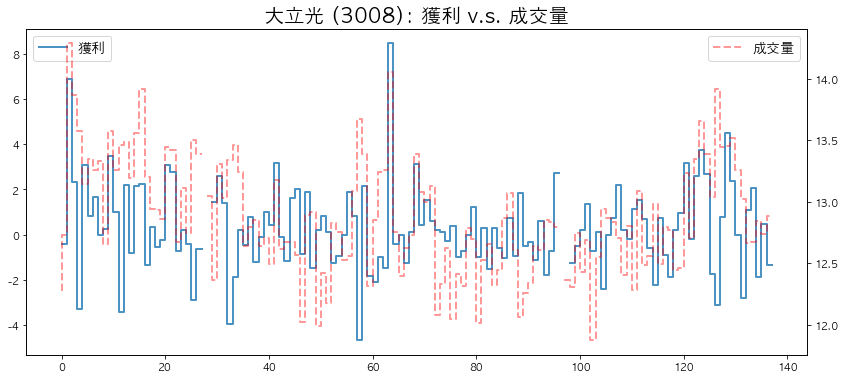

In [8]:
from matplotlib import font_manager,rcParams

rcParams['font.family'] = 'AppleGothic' 
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
fig, ax1 = plt.subplots(figsize=(14,6))
ax1.plot(ret,drawstyle='steps',alpha=0.8,linewidth=2,label="獲利")

ax2 = ax1.twinx()
ax2.plot(vol,drawstyle='steps',alpha=0.4,linewidth=2,color="red",linestyle='--',label="成交量")

ax1.legend(fontsize=14,loc='upper left')  
ax2.legend(fontsize=14)  

ax1.set_title('大立光 (3008): 獲利 v.s. 成交量',fontsize=20) 

In [13]:
%R tail(TW3008.dat) 

array([[   5595.,    5635.,    5510.,    5580.,  572000.,    5580.],
       [   5525.,    5530.,    5425.,    5425.,  453000.,    5425.],
       [   5380.,    5495.,    5380.,    5485.,  316000.,    5485.],
       [   5535.,    5600.,    5520.,    5600.,  318000.,    5600.],
       [   5600.,    5610.,    5495.,    5495.,  378000.,    5495.],
       [   5515.,    5600.,    5515.,    5520.,  342000.,    5520.]])

In [14]:
%%R

library(quantmod)
TW3008.dat = getSymbols("3008.TW", from="2017-01-01",to="2017-07-25", adjust = T, auto.assign = FALSE)
head(TW3008.dat);tail(TW3008.dat)   
#IBM.dat["2016-06-01::2016-12-31",1:3]
Return = diff(log(TW3008.dat[, 4]))*100
volume = log(TW3008.dat[, 5])
plot(Return, xlab = "dates", main = "Time series of TW 3008 returns")
plot(volume, xlab = "dates", main = "Time series of TW 3008 volume")
dat0=cbind(Return, volume)
head(dat0)
dat=na.omit(dat0)
head(dat)

           X3008.TW.Close X3008.TW.Volume
2017-01-04     -0.3960401        12.73376
2017-01-05      6.8992871        14.28676
2017-01-06      2.3185907        13.86525
2017-01-09     -3.3111547        13.57216
2017-01-10      3.0696087        13.14803
2017-01-11      0.8428707        13.34870


In [12]:
%R colnames(dat)=c("Ret","Vol")

array(['Ret', 'Vol'],
      dtype='<U3')

Var Model with 1-lag, Var(1)
---
$\mathbf{R_t,V_t}$: represent Return and Volume at time $t$ step.

$$
\left(\begin{array}{c}  
     \mathbf{
     R_t\\
     V_t
     }
   \end{array}\right) = \left(\begin{array}{c}
     - 4.3382\\
     6.26743
   \end{array}\right) + \left(\begin{array}{cc}
     - 0.0318 & 0.3615\\
     - 0.02132 & 0.51397
   \end{array}\right) \left(\begin{array}{c}
     \mathbf{
     R_{t - 1}\\
     V_{t - 1}
     }
   \end{array} \right)+\mathbf{u_t}
$$
All the eigenvalues of $\beta<1$ implies the system is stationary. 

In [52]:
from numpy import linalg as LA
import numpy as np

In [54]:
beta= np.array([[-0.0318,0.3615],[-0.02132,0.51397]])
w,v=LA.eig(beta)
w

array([-0.01729271,  0.49946271])

In [16]:
%%R

library(vars)
out.var=VAR(dat,p=1,type="const",season=NULL, exogen=NULL, lag.max=NULL)
options(digits=4)
coef(out.var)

/Users/cch/anaconda36/anaconda/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: MASS

  warnings.warn(x, RRuntimeWarning)
/Users/cch/anaconda36/anaconda/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: strucchange

  warnings.warn(x, RRuntimeWarning)
/Users/cch/anaconda36/anaconda/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: sandwich

  warnings.warn(x, RRuntimeWarning)
/Users/cch/anaconda36/anaconda/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: urca

  warnings.warn(x, RRuntimeWarning)
/Users/cch/anaconda36/anaconda/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: lmtest

  warnings.warn(x, RRuntimeWarning)


$X3008.TW.Close
                   Estimate Std. Error t value Pr(>|t|)
X3008.TW.Close.l1   -0.0318    0.09274 -0.3429   0.7322
X3008.TW.Volume.l1   0.3615    0.37587  0.9618   0.3380
const               -4.3382    4.83800 -0.8967   0.3716

$X3008.TW.Volume
                   Estimate Std. Error t value  Pr(>|t|)
X3008.TW.Close.l1  -0.02132    0.01989  -1.072 2.859e-01
X3008.TW.Volume.l1  0.51397    0.08060   6.377 3.127e-09
const               6.26743    1.03746   6.041 1.602e-08



Granger Causality Test
---
<big>**Var(2)** Model</big>
$$
\mathbf{
\left(\begin{array}{c}
     \mathbf{
       R_t\\
       V_t
     }
   \end{array}\right) = \left(\begin{array}{c}
     \alpha_1\\
     \alpha_2
   \end{array}\right) + \left(\begin{array}{cc}
     \beta_{11} & \color{red}{\beta_{12}} & \beta_{13} & \color{red}{\beta_{14}} \\
     \color{brown}{\beta_{21}} & \beta_{22} &  \color{brown}{\beta_{23}} & \beta_{24}
   \end{array}\right) \left(\begin{array}{c}
    \mathbf{
     R_{t - 1}\\
     V_{t - 1}\\
     R_{t - 2}\\
     V_{t - 2}
    } 
   \end{array}\right)+\mathbf{u_t}
}
$$

Hypothese Tests of Causality
---
<b>
$H_0:\beta_{12}=\beta_{14}=0$, $R_t$ is no causality with $V_t$,<br>
$H_0:\beta_{21}=\beta_{23}=0$, $V_t$ is no causality with $R_t$,<br>
</b>
with test Estimate: <b>Wald-statistic $\sim \chi^2(2)$</b>

**Result of this case**
- use bootstrapping method 5000 times,
- $p$ values &lt;0.05: do not accept all $H_0$'s, i.e. Return causes Volume and vice visa.

In [57]:
%%R 

causality(out.var,cause="Ret",boot=TRUE, boot.runs=5000)

$Granger

	Granger causality H0: Ret do not Granger-cause Vol

data:  VAR object out.var
F-Test = 1.1, boot.runs = 5000, p-value = 0.3


$Instant

	H0: No instantaneous causality between: Ret and Vol

data:  VAR object out.var
Chi-squared = 8.8, df = 1, p-value = 0.003




In [56]:
%%R

causality(out.var,cause="Vol",boot=TRUE, boot.runs=5000)

$Granger

	Granger causality H0: Vol do not Granger-cause Ret

data:  VAR object out.var
F-Test = 0.92, boot.runs = 5000, p-value = 0.3


$Instant

	H0: No instantaneous causality between: Vol and Ret

data:  VAR object out.var
Chi-squared = 8.8, df = 1, p-value = 0.003




Impulse-response Analysis
---
Calculate the impulse to **Ret**, which come from **Vol**, 10 records created in dafault and accompanies with 95% upper and lower bands:

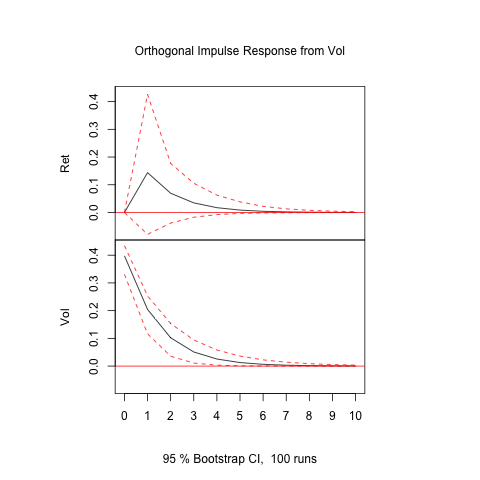

In [60]:
%%R

output.irf=irf(out.var, impulse = "Vol", response = c("Ret", "Vol"),boot=TRUE, boot.runs=1000)
plot(output.irf)



In [58]:
%%R

output.irf


Impulse response coefficients
$Vol
            Ret       Vol
 [1,] 0.0000000 0.3976632
 [2,] 0.1437552 0.2043863
 [3,] 0.0693142 0.1019840
 [4,] 0.0346630 0.0509391
 [5,] 0.0173122 0.0254422
 [6,] 0.0086468 0.0127075
 [7,] 0.0043188 0.0063469
 [8,] 0.0021571 0.0031701
 [9,] 0.0010774 0.0015833
[10,] 0.0005381 0.0007908
[11,] 0.0002688 0.0003950


Lower Band, CI= 0.95 
$Vol
             Ret       Vol
 [1,]  0.0000000 3.446e-01
 [2,] -0.1183101 1.358e-01
 [3,] -0.0514477 4.516e-02
 [4,] -0.0264562 1.463e-02
 [5,] -0.0131971 5.042e-03
 [6,] -0.0068649 1.738e-03
 [7,] -0.0035680 5.987e-04
 [8,] -0.0018552 2.062e-04
 [9,] -0.0009648 7.104e-05
[10,] -0.0005019 2.449e-05
[11,] -0.0002612 8.449e-06


Upper Band, CI= 0.95 
$Vol
           Ret      Vol
 [1,] 0.000000 0.451552
 [2,] 0.430688 0.257773
 [3,] 0.219837 0.153670
 [4,] 0.117313 0.096340
 [5,] 0.064851 0.059791
 [6,] 0.037442 0.037092
 [7,] 0.021168 0.023017
 [8,] 0.012306 0.014283
 [9,] 0.007771 0.008864
[10,] 0.004954 0.005502
[11,] 

Stability test
---

In [62]:
%%R

output.stabil = stability(out.var, type = "OLS-CUSUM")
stability(out.var, type = "OLS-CUSUM")

$Ret

Empirical Fluctuation Process: OLS-based CUSUM test 

Call: efp(formula = formula, data = data, type = type, h = h, dynamic = dynamic, 
    rescale = rescale)


$Vol

Empirical Fluctuation Process: OLS-based CUSUM test 

Call: efp(formula = formula, data = data, type = type, h = h, dynamic = dynamic, 
    rescale = rescale)




Portmanteau Test for Residuals self-relation
---

In [64]:
%%R

output.serial =serial.test(out.var, lags.pt = 16, type = "PT.adjusted")
serial.test(out.var, lags.pt = 16, type = "PT.adjusted")


	Portmanteau Test (adjusted)

data:  Residuals of VAR object out.var
Chi-squared = 88, df = 60, p-value = 0.01



In [59]:
%%R

output.stabil = stability(out.var, type = "OLS-CUSUM")

output.serial =serial.test(out.var, lags.pt = 16, type = "PT.adjusted")
output.normality =normality.test(out.var)

VAR(dat,p=1,type="const",season=NULL, exogen=NULL, lag.max=20,ic="AIC")


VAR Estimation Results:

Estimated coefficients for equation Ret: 
Call:
Ret = Ret.l1 + Vol.l1 + Ret.l2 + Vol.l2 + Ret.l3 + Vol.l3 + Ret.l4 + Vol.l4 + Ret.l5 + Vol.l5 + Ret.l6 + Vol.l6 + const 

    Ret.l1     Vol.l1     Ret.l2     Vol.l2     Ret.l3     Vol.l3     Ret.l4 
 -0.005642   0.147310  -0.146609   0.189834  -0.190670   0.333474  -0.113482 
    Vol.l4     Ret.l5     Vol.l5     Ret.l6     Vol.l6      const 
 -0.415825   0.219110  -0.396592  -0.210199   1.207103 -13.357301 


Estimated coefficients for equation Vol: 
Call:
Vol = Ret.l1 + Vol.l1 + Ret.l2 + Vol.l2 + Ret.l3 + Vol.l3 + Ret.l4 + Vol.l4 + Ret.l5 + Vol.l5 + Ret.l6 + Vol.l6 + const 

   Ret.l1    Vol.l1    Ret.l2    Vol.l2    Ret.l3    Vol.l3    Ret.l4    Vol.l4 
-0.031903  0.373691  0.008124  0.044857  0.011392  0.071310 -0.031584  0.011097 
   Ret.l5    Vol.l5    Ret.l6    Vol.l6     const 
 0.018499  0.181250  0.012698  0.047362  3.468680 




Normality Test
---
If yes, the estimator of OLS of degenerated Var(p) is as same as the generalized least squares estimator, GLS.

In [65]:
%%R

output.normality =normality.test(out.var)
normality.test(out.var)



$JB

	JB-Test (multivariate)

data:  Residuals of VAR object out.var
Chi-squared = 42, df = 4, p-value = 1e-08


$Skewness

	Skewness only (multivariate)

data:  Residuals of VAR object out.var
Chi-squared = 9.5, df = 2, p-value = 0.009


$Kurtosis

	Kurtosis only (multivariate)

data:  Residuals of VAR object out.var
Chi-squared = 33, df = 2, p-value = 8e-08




Optimal lagging period
---
How to find out the best lag, only Var(1) and Var(2) considered above?

1. estimate and fit each lag within the range of lag.max,
- use one of rules, ```ic=C("AIC","HQ","SC","FPE")``` 
  - largest one in AIC
  - smallest in SC
  - midlle in HQ
- here, suggests the best fit is $p=6$ lags   

In [66]:
%%R

VAR(dat,p=1,type="const",season=NULL, exogen=NULL, lag.max=20,ic="AIC")


VAR Estimation Results:

Estimated coefficients for equation Ret: 
Call:
Ret = Ret.l1 + Vol.l1 + Ret.l2 + Vol.l2 + Ret.l3 + Vol.l3 + Ret.l4 + Vol.l4 + Ret.l5 + Vol.l5 + Ret.l6 + Vol.l6 + const 

    Ret.l1     Vol.l1     Ret.l2     Vol.l2     Ret.l3     Vol.l3     Ret.l4 
 -0.005642   0.147310  -0.146609   0.189834  -0.190670   0.333474  -0.113482 
    Vol.l4     Ret.l5     Vol.l5     Ret.l6     Vol.l6      const 
 -0.415825   0.219110  -0.396592  -0.210199   1.207103 -13.357301 


Estimated coefficients for equation Vol: 
Call:
Vol = Ret.l1 + Vol.l1 + Ret.l2 + Vol.l2 + Ret.l3 + Vol.l3 + Ret.l4 + Vol.l4 + Ret.l5 + Vol.l5 + Ret.l6 + Vol.l6 + const 

   Ret.l1    Vol.l1    Ret.l2    Vol.l2    Ret.l3    Vol.l3    Ret.l4    Vol.l4 
-0.031903  0.373691  0.008124  0.044857  0.011392  0.071310 -0.031584  0.011097 
   Ret.l5    Vol.l5    Ret.l6    Vol.l6     const 
 0.018499  0.181250  0.012698  0.047362  3.468680 




# Prediction
Having the optimal model, make the predict with the estimated lag-period parameter. Also retrieve the R-data and make the graph output in Python environment. Here ten days' pediction was estimated since 07-27-2017.

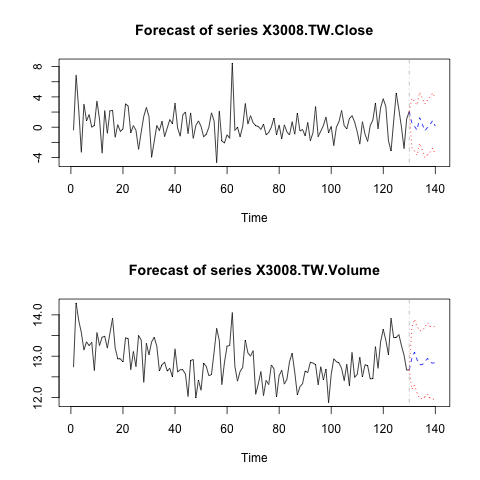

In [211]:
%%R

library(forecast)
var <- VAR(dat,p=6,type="const",season=NULL, exogen=NULL, lag.max=NULL)
#ffst <- forecast(var, h=10)
fpdt <- predict(var,n.ahead=10)
plot(fpdt, xlab="Time")

In [212]:
%%R 

fpdt[1]
#fpdt[1]$fcst$X3008.TW.Close[1:10]

$fcst
$fcst$X3008.TW.Close
          fcst  lower upper    CI
 [1,]  0.55571 -2.712 3.823 3.267
 [2,]  0.13502 -3.134 3.404 3.269
 [3,] -0.39363 -3.699 2.912 3.306
 [4,]  1.25284 -2.116 4.622 3.369
 [5,]  0.40949 -2.987 3.806 3.396
 [6,] -0.46419 -3.991 3.063 3.527
 [7,] -0.04017 -3.661 3.581 3.621
 [8,]  0.35893 -3.288 4.006 3.647
 [9,]  0.87763 -2.776 4.531 3.654
[10,]  0.14296 -3.516 3.802 3.659

$fcst$X3008.TW.Volume
       fcst lower upper     CI
 [1,] 12.95 12.20 13.69 0.7470
 [2,] 13.10 12.30 13.89 0.7968
 [3,] 12.91 12.11 13.72 0.8077
 [4,] 12.80 11.98 13.61 0.8177
 [5,] 12.80 11.97 13.62 0.8230
 [6,] 12.86 12.02 13.71 0.8459
 [7,] 12.95 12.08 13.81 0.8653
 [8,] 12.86 11.99 13.73 0.8699
 [9,] 12.83 11.96 13.71 0.8747
[10,] 12.84 11.97 13.72 0.8793




In [213]:
%%R 

fpdt[1]
#fpdt[1]$fcst$X3008.TW.Close[1:10]

$fcst
$fcst$X3008.TW.Close
          fcst  lower upper    CI
 [1,]  0.55571 -2.712 3.823 3.267
 [2,]  0.13502 -3.134 3.404 3.269
 [3,] -0.39363 -3.699 2.912 3.306
 [4,]  1.25284 -2.116 4.622 3.369
 [5,]  0.40949 -2.987 3.806 3.396
 [6,] -0.46419 -3.991 3.063 3.527
 [7,] -0.04017 -3.661 3.581 3.621
 [8,]  0.35893 -3.288 4.006 3.647
 [9,]  0.87763 -2.776 4.531 3.654
[10,]  0.14296 -3.516 3.802 3.659

$fcst$X3008.TW.Volume
       fcst lower upper     CI
 [1,] 12.95 12.20 13.69 0.7470
 [2,] 13.10 12.30 13.89 0.7968
 [3,] 12.91 12.11 13.72 0.8077
 [4,] 12.80 11.98 13.61 0.8177
 [5,] 12.80 11.97 13.62 0.8230
 [6,] 12.86 12.02 13.71 0.8459
 [7,] 12.95 12.08 13.81 0.8653
 [8,] 12.86 11.99 13.73 0.8699
 [9,] 12.83 11.96 13.71 0.8747
[10,] 12.84 11.97 13.72 0.8793




In [226]:
%R fpdt[1]$fcst$X3008.TW.Close[1:10]

array([ 0.55570702,  0.13501908, -0.39363228,  1.25284353,  0.40949224,
       -0.46418907, -0.0401733 ,  0.35893283,  0.87762623,  0.14295777])

In [215]:
%R fpdt[1]$fcst$X3008.TW.Close

array([[ 0.55570702, -2.71163767,  3.8230517 ,  3.26734469],
       [ 0.13501908, -3.13410306,  3.40414122,  3.26912214],
       [-0.39363228, -3.69936591,  2.91210136,  3.30573364],
       [ 1.25284353, -2.11605733,  4.62174439,  3.36890086],
       [ 0.40949224, -2.9865771 ,  3.80556159,  3.39606935],
       [-0.46418907, -3.99147826,  3.06310012,  3.52728919],
       [-0.0401733 , -3.66120126,  3.58085465,  3.62102795],
       [ 0.35893283, -3.288351  ,  4.00621666,  3.64728383],
       [ 0.87762623, -2.77615959,  4.53141205,  3.65378582],
       [ 0.14295777, -3.51632097,  3.80223651,  3.65927874]])

In [216]:
import numpy as np
fpdt_array =  %R fpdt[1]$fcst$X3008.TW.Close
fpdt_vol_array =  %R fpdt[1]$fcst$X3008.TW.Volume

In [221]:
# convert R output into Numpy and categoried by features
fpdt_array.reshape((10, 4))
fpdt_np=fpdt_array.T
fpdt_vol_array.reshape((10, 4))
fpdt_vol_np=fpdt_vol_array.T


In [222]:
# calculate sizes of ret and prediction data
num=len(ret)
period=len(fpdt_np[0])

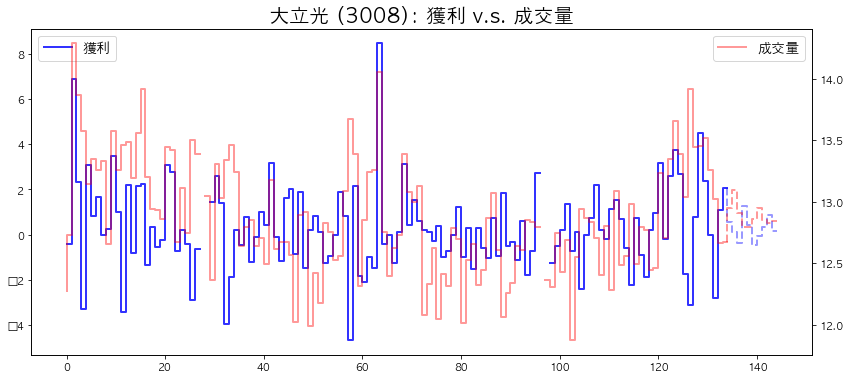

In [225]:
from matplotlib import font_manager,rcParams


# conjaction the data, ret and vol, with predict data
ret_pt = np.linspace(num-1,num+period-1,period+1)
ret_p  = np.append(ret[-1],fpdt_np[0])

vol_pt = np.linspace(num-1,num+period-1,period+1)
vol_p  = np.append(vol[-1],fpdt_vol_np[0])

rcParams['font.family'] = 'AppleGothic' 
fig, ax1 = plt.subplots(figsize=(14,6))
ax1.plot(ret,drawstyle='steps',color='blue',alpha=0.8,linewidth=2,label="獲利")

ax1.plot(ret_pt,ret_p,drawstyle='steps',alpha=0.4,linewidth=2,color='blue',linestyle='--')

ax2 = ax1.twinx()
ax2.plot(vol,drawstyle='steps',alpha=0.4,linewidth=2,color="red",label="成交量")

ax2.plot(vol_pt,vol_p,drawstyle='steps',alpha=0.4,linewidth=2,color='red',linestyle='--')


ax1.legend(fontsize=14,loc='upper left')  
ax2.legend(fontsize=14)  

ax1.set_title('大立光 (3008): 獲利 v.s. 成交量',fontsize=20) 